In [242]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
import numpy as np


In [244]:
# %conda install -y ipywidgets

In [245]:
import numpy as np
# from vae.arch_custommazelightk3conv1 import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [246]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 64, 64, 1)    10          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_67 (Flatten)            (None, 4096)         0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           131104      flatten_67[0][0]                 
____________________________________________________________________________________________

In [247]:
# from tensorflow.keras.models import Model

In [248]:
# vae=load_model('./vae/')

In [249]:
DIR_NAME = './data/custom2dmaze_gray/'
file = os.listdir(DIR_NAME)[5]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

2110475941.npz
(1000, 128, 128, 1)


In [250]:
# filelist = os.listdir(DIR_NAME)
# filelist = [x for x in filelist if x != '.DS_Store']
# filelist.sort()

In [251]:
# %conda install -y graphviz

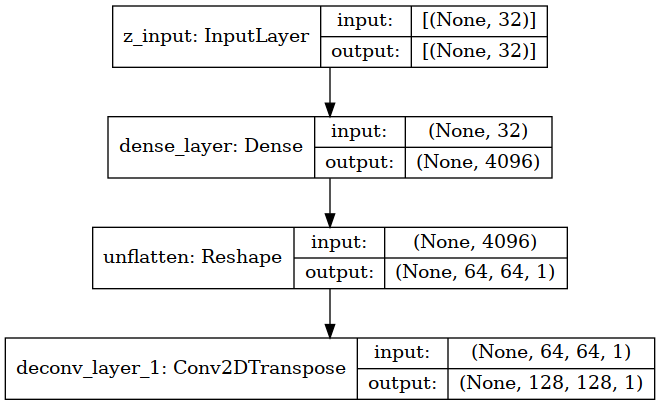

In [252]:
# plot_model(vae1.encoder, to_file='./vae/encoderconv1.png', show_shapes=True)
plot_model(vae1.decoder, to_file='./vae/decoderconv1.png', show_shapes=True)


In [253]:
layer_outputs = [layer.output for layer in vae1.encoder.layers[:2]]

In [254]:
from tensorflow.keras.models import Model

In [255]:
activation_model = Model(vae1.encoder.input, layer_outputs)
activation_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
observation_input (InputLaye [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 64, 64, 1)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [256]:
# activations = activation_model.predict(np.array([obs]))[0][0][:,:,0]
# activations

In [257]:
# obs = obs_data[364]
# activations = activation_model.predict(np.array([obs]))[0][0]
# # z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
# print(z_decoded1.shape)
# plt.subplot(121)
# plt.imshow( obs[:,:,0],cmap='gray')
# plt.subplot(122)
# plt.imshow( activations[:,:,0],cmap='gray')

In [258]:
# plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)

In [259]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')

In [260]:
file = os.listdir(DIR_NAME)[1]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
obs

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [261]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 64, 64, 1)    10          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_68 (Flatten)            (None, 4096)         0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           131104      flatten_68[0][0]                 
____________________________________________________________________________________________

/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


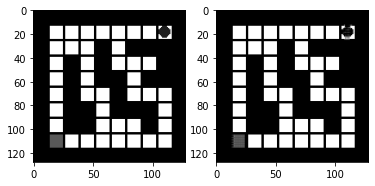

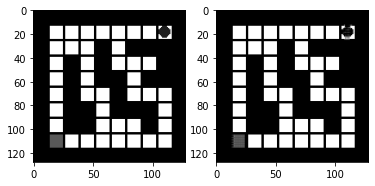

In [262]:
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

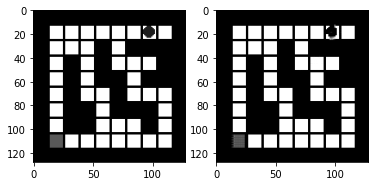

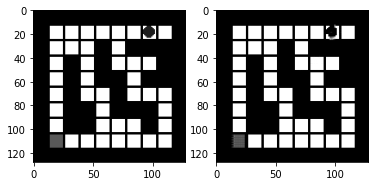

In [263]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[778]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [264]:
print(z_decoded1.shape)

(128, 128, 1)


In [265]:
# vae2 = VAE()
# vae2.set_weights('./vae/weights1.1rand3.ckpt')

In [266]:
np.array([obs]).shape

(1, 128, 128, 1)

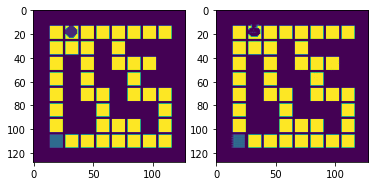

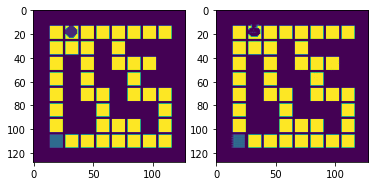

In [267]:
file = os.listdir(DIR_NAME)[19]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [268]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights1.1rand3.ckpt')

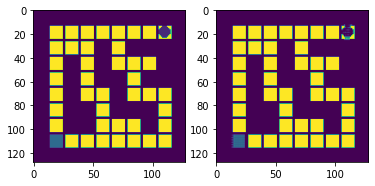

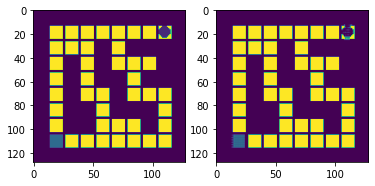

In [269]:

obs = obs_data[0]
z_decoded = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [270]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights200.20804.h5')

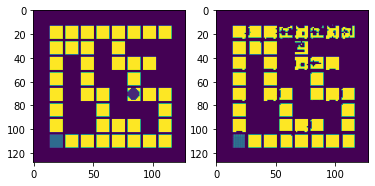

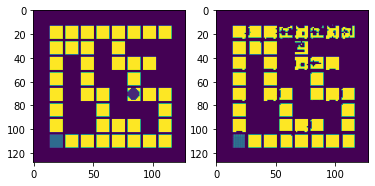

In [271]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.5z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


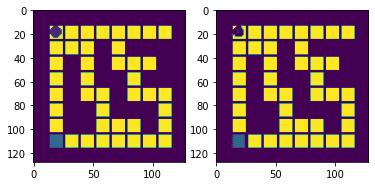

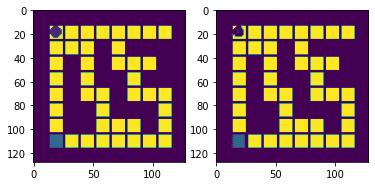

In [272]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[990]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[368]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


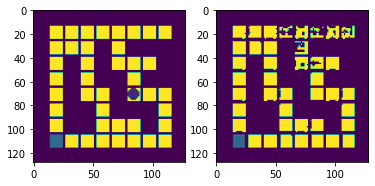

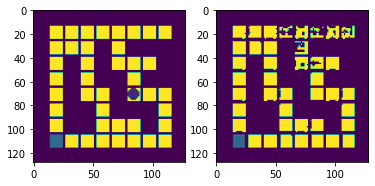

In [273]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.5z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [274]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 5, 5, 2)      20          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_73 (Flatten)            (None, 50)           0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 16)           816         flatten_73[0][0]                 
____________________________________________________________________________________________

ValueError: in user code:

    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /home/shun/WorldModels/vae/arch_custommazegrayz32k3conv1.py:74 call  *
        z_mean, z_log_var, latent = self.encoder(inputs)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__  **
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:270 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer encoder: expected shape=(None, 10, 10, 1), found shape=(None, 128, 128, 1)


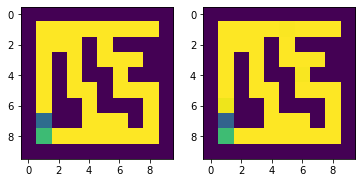

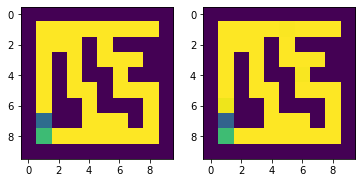

In [ ]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
# filelist = os.listdir('./vae/decoded1')
# filelist = [x for x in filelist if (x != '.DS_Store' and x!='.gitignore')]
# # filelist.sort()
# length_filelist = len(filelist)
# sorted_names = sorted(filelist, key=lambda name: int(''.join(filter(str.isdigit, name))))

In [ ]:
import time

In [ ]:
# im_datas=[]
# for i in range(300):
#     im_data = np.load(f'./vae/decoded1/{sorted_names[i]}')
    
#     im_datas.append(im_data['z_decoded1_array'])
    
#     plt.gca().cla() 
#     plt.imshow(im_datas[i])
    
    
#     time.sleep(0.3)
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    
#     print(i)

In [ ]:
# ### output from the full_model
# DIR_NAME = './data/custom2dmaze_rollout3/'
# file = os.listdir(DIR_NAME)[17]#あるエピソード取り出す
# obs_data = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データをとりだす(300,64,64,3)

# obs = obs_data[4]#1ステップ時間の観測(1,64,64,3)

# reconstruction = vae1.full_model.predict(np.array([obs]))[0]

# ax1 = plt.subplot(121)
# plt.imshow( obs[:,:,0])
# ax1.axis('off')
# ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
#          transform=ax1.transAxes)

# ax2 = plt.subplot(122)
# plt.imshow( reconstruction)
# ax2.axis('off')
# ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
#          transform=ax2.transAxes);


In [ ]:
np.array([obs]).shape

(1, 128, 128, 1)

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae1.encoder.predict(np.array([obs]))
print("z = " + str(encoded_z))

mu = [ 0.4052 -0.6339 -0.3962  0.1453 -0.2608 -0.6036  0.978   1.2795 -0.2097
  0.3751  0.3876 -1.8744 -0.5879  0.241  -0.258   0.2994 -0.4376  1.929
  0.3913  0.3993 -0.0944  0.12    0.4191  0.0435  0.1452 -0.0391 -0.0808
 -0.3355 -0.086  -0.2027 -0.1219 -0.6791]
log_var = [-0.6103 -0.5659 -1.3924 -0.7527 -0.6534 -6.2896 -0.5953 -1.3204 -1.3567
 -1.207  -0.7036 -2.4283 -0.6063 -0.1993 -1.0362 -0.8405 -1.2472 -2.1591
 -0.8678 -1.2869 -1.2143 -1.0572 -0.4279 -1.608  -0.7598 -1.0377 -1.0812
 -1.5096 -1.0368 -1.2465 -1.7207 -1.0016]
z = [array([[ 0.4052, -0.6339, -0.3962,  0.1453, -0.2608, -0.6036,  0.978 ,
         1.2795, -0.2097,  0.3751,  0.3876, -1.8744, -0.5879,  0.241 ,
        -0.258 ,  0.2994, -0.4376,  1.929 ,  0.3913,  0.3993, -0.0944,
         0.12  ,  0.4191,  0.0435,  0.1452, -0.0391, -0.0808, -0.3355,
        -0.086 , -0.2027, -0.1219, -0.6791]], dtype=float32), array([[-0.6103, -0.5659, -1.3924, -0.7527, -0.6534, -6.2896, -0.5953,
        -1.3204, -1.3567, -1.207 , -0.7036

In [ ]:
print(vae1.encoder.predict(np.array([obs])))

[array([[ 0.4052, -0.6339, -0.3962,  0.1453, -0.2608, -0.6036,  0.978 ,
         1.2795, -0.2097,  0.3751,  0.3876, -1.8744, -0.5879,  0.241 ,
        -0.258 ,  0.2994, -0.4376,  1.929 ,  0.3913,  0.3993, -0.0944,
         0.12  ,  0.4191,  0.0435,  0.1452, -0.0391, -0.0808, -0.3355,
        -0.086 , -0.2027, -0.1219, -0.6791]], dtype=float32), array([[-0.6103, -0.5659, -1.3924, -0.7527, -0.6534, -6.2896, -0.5953,
        -1.3204, -1.3567, -1.207 , -0.7036, -2.4283, -0.6063, -0.1993,
        -1.0362, -0.8405, -1.2472, -2.1591, -0.8678, -1.2869, -1.2143,
        -1.0572, -0.4279, -1.608 , -0.7598, -1.0377, -1.0812, -1.5096,
        -1.0368, -1.2465, -1.7207, -1.0016]], dtype=float32), array([[ 1.8854, -0.6961,  0.038 ,  0.7082,  0.4846, -0.6293,  1.0546,
         1.4664, -1.0552,  0.6665,  0.5733, -2.0811, -2.6906, -1.1962,
         0.4915,  0.481 , -0.9447,  2.1753,  0.7077, -0.0703,  0.0858,
         0.3117,  0.9939,  0.2352, -0.2258,  0.2344, -1.1569, -0.6435,
         0.5107,  0.183

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[ 0.3812 -0.4114 -0.451   1.0984  0.3261 -0.6724  1.7623  0.7456 -0.521
   0.6108  1.7673 -2.1596 -1.1153  1.2059 -0.2492 -0.6864  0.2307  2.708
   1.2911  0.5553  0.54    0.2816 -0.3035 -0.556   0.1744  0.448   0.5934
  -0.2527 -1.3093 -1.0486  0.1266 -0.9809]]


informative dimensions:


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

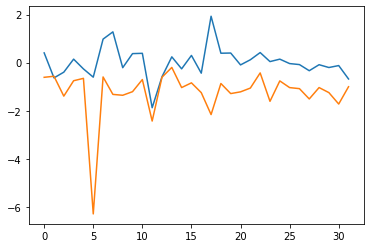

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

informative dimensions:


array([ 5, 11, 17])

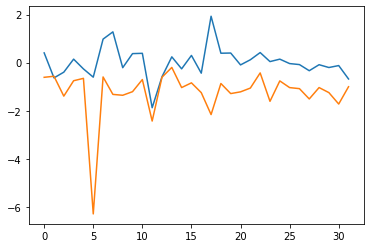

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 2)[0]
hot_zs

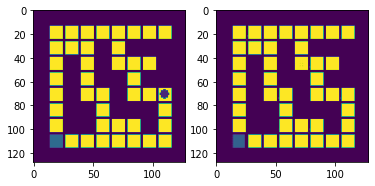

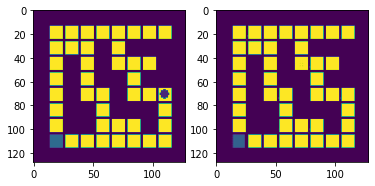

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.5z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

z = [[-0.4844 -0.9026 -0.8873  1.0536  0.1799  0.5102  0.6712 -0.3427 -0.1166
  -0.7356 -0.8364 -1.0462  0.9211 -1.1817  0.0806 -0.5909]]


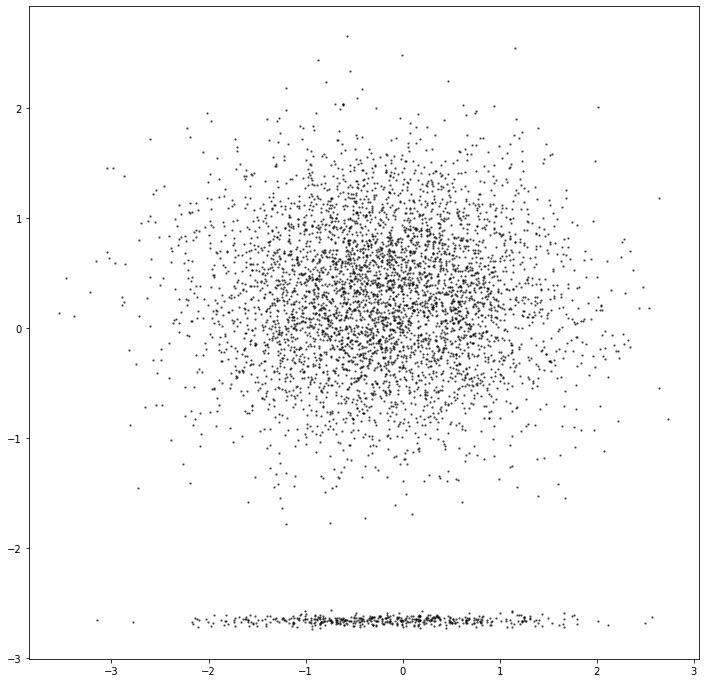

In [ ]:
n_to_show = 5000
figsize = 12
index1=4
index2=9

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data3[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 0.2404  1.2838 -0.7972 -1.496  -1.7575  0.1623  0.3243 -1.1042 -1.1483
   1.5904 -0.9407 -0.2825  0.5258  0.4928 -1.7153 -1.5219  0.6801  0.254
   0.4588 -0.7353 -1.9762 -1.6089 -0.5032 -0.6081  0.7688 -0.5667 -1.4944
   0.665  -1.2461 -0.3012  0.1742 -0.1926]
 [ 0.2404  1.2838 -0.7972 -1.496  -1.7575  0.1623  0.3243 -1.1042 -1.1483
   1.5904 -0.9407 -0.2825  0.5258  0.4928 -1.7153 -1.5219  0.6801  0.254
   0.4588 -0.7353 -1.9762 -1.6089 -0.5032 -0.6081  0.7688 -0.5667 -1.4944
   0.665  -1.2461 -0.3012  0.1742 -0.1926]
 [ 0.2404  1.2838 -0.7972 -1.496  -1.7575  0.1623  0.3243 -1.1042 -1.1483
   1.5904 -0.9407 -0.2825  0.5258  0.4928 -1.7153 -1.5219  0.6801  0.254
   0.4588 -0.7353 -1.9762 -1.6089 -0.5032 -0.6081  0.7688 -0.5667 -1.4944
   0.665  -1.2461 -0.3012  0.1742 -0.1926]
 [ 0.2404  1.2838 -0.7972 -1.496  -1.7575  0.1623  0.3243 -1.1042 -1.1483
   1.5904 -0.9407 -0.2825  0.5258  0.4928 -1.7153 -1.5219  0.6801  0.254
   0.4588 -0.7353 -1.9762 -1.6089 -0.5032 -0.6081  0.7688

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[0]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 0.0822  1.316  -0.7071 -0.2336 -0.23    0.1099  0.2389 -0.1934 -0.2209
   0.1675  0.1592 -0.1522 -0.0536  0.5673 -0.2627 -1.8439  0.8419  0.234
   0.2338  0.4714 -0.0778 -0.25   -0.5748 -0.4968  0.1475  0.0457 -0.2612
   0.5424  0.2073  0.0008  0.3203 -0.0595]
 [ 0.0822  1.316  -0.7071 -0.2336 -0.23    0.1099  0.2389 -0.1934 -0.2209
   0.1675  0.1592 -0.1522 -0.0536  0.5673 -0.2627 -1.8439  0.8419  0.234
   0.2338  0.4714 -0.0778 -0.25   -0.5748 -0.4968  0.1475  0.0457 -0.2612
   0.5424  0.2073  0.0008  0.3203 -0.0595]
 [ 0.0822  1.316  -0.7071 -0.2336 -0.23    0.1099  0.2389 -0.1934 -0.2209
   0.1675  0.1592 -0.1522 -0.0536  0.5673 -0.2627 -1.8439  0.8419  0.234
   0.2338  0.4714 -0.0778 -0.25   -0.5748 -0.4968  0.1475  0.0457 -0.2612
   0.5424  0.2073  0.0008  0.3203 -0.0595]
 [ 0.0822  1.316  -0.7071 -0.2336 -0.23    0.1099  0.2389 -0.1934 -0.2209
   0.1675  0.1592 -0.1522 -0.0536  0.5673 -0.2627 -1.8439  0.8419  0.234
   0.2338  0.4714 -0.0778 -0.25   -0.5748 -0.4968  0.1475

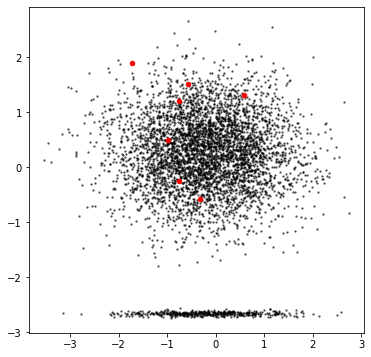

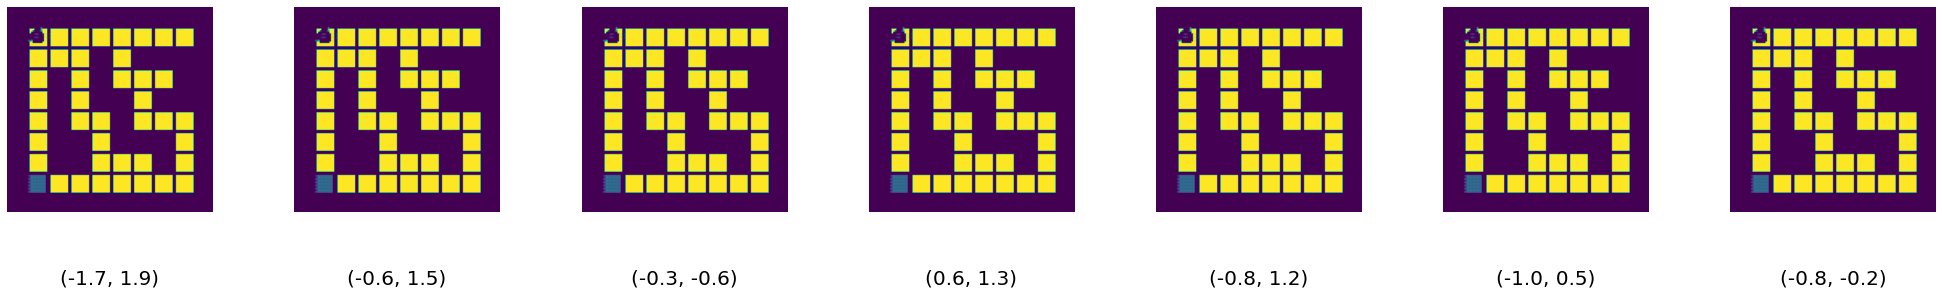

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

In [ ]:
# figsize = 6
# plt.figure(figsize=(figsize, figsize))
# plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


# grid_size = 10
# grid_depth = 1
# figsize = 6
# figsize1 = 50
# batchsize = 7
# # z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# # z_grid = 
# encoded_z[:,index1] = np.random.normal()
# encoded_z[:,index2] = np.random.normal()
# # x = np.random.normal(size = grid_size * grid_depth)
# # y = np.random.normal(size = grid_size * grid_depth)

# # z_grid = np.array(list(zip(x, y)))
# # reconst = vae1.decoder.predict(z_grid)
# reconst = vae1.decoder.predict(encoded_z)
# plt.scatter(z_grid[:, index1] , z_grid[:, index2], c = 'red', alpha=1, s=20)
# plt.show()

# fig = plt.figure(figsize=(figsize1, 30))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# for i in range(batchsize):
#     ax = fig.add_subplot(grid_depth, grid_size, i+1)
#     ax.axis('off')
#     ax.text(0.5, -0.35, str((np.round(z_grid[0,index1],1),np.round(z_grid[0,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
#     ax.imshow(reconst[0, :,:,0])

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 64, 64, 1)    10          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_31 (Flatten)            (None, 4096)         0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           131104      flatten_31[0][0]                 
____________________________________________________________________________________________

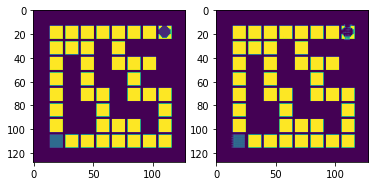

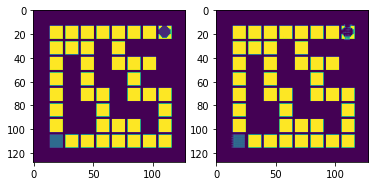

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))


mu = [ 0.4052 -0.6339 -0.3962  0.1453 -0.2608 -0.6036  0.978   1.2795 -0.2097
  0.3751  0.3876 -1.8744 -0.5879  0.241  -0.258   0.2994 -0.4376  1.929
  0.3913  0.3993 -0.0944  0.12    0.4191  0.0435  0.1452 -0.0391 -0.0808
 -0.3355 -0.086  -0.2027 -0.1219 -0.6791]
log_var = [-0.6103 -0.5659 -1.3924 -0.7527 -0.6534 -6.2896 -0.5953 -1.3204 -1.3567
 -1.207  -0.7036 -2.4283 -0.6063 -0.1993 -1.0362 -0.8405 -1.2472 -2.1591
 -0.8678 -1.2869 -1.2143 -1.0572 -0.4279 -1.608  -0.7598 -1.0377 -1.0812
 -1.5096 -1.0368 -1.2465 -1.7207 -1.0016]


In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[ 1.1254 -1.3956 -0.3223 -0.3789 -1.1146 -0.5909  1.6304  1.2194 -0.0462
   0.6201  0.0644 -2.171  -0.7564 -0.0883  0.3426  0.4618 -0.2786  1.688
   0.5797  0.1561  0.6233 -0.3708 -0.8315  0.5219 -0.6036  0.3815 -0.4839
  -0.3003 -1.2971  0.6468  0.5598 -0.4856]]


informative dimensions:


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

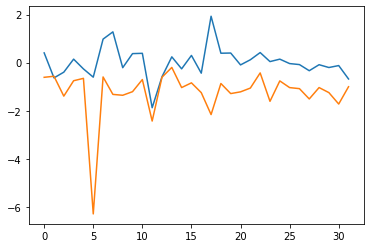

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

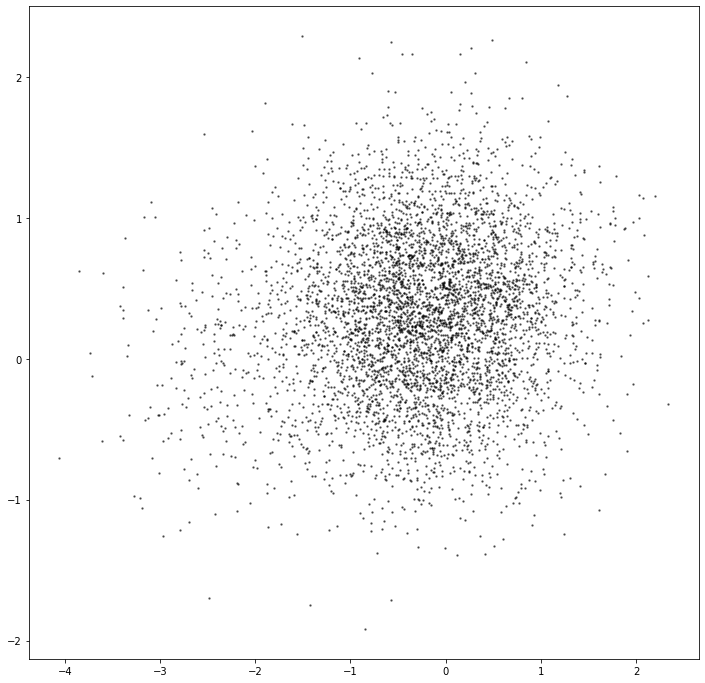

In [ ]:
n_to_show = 5000
figsize = 12
index1=4
index2=9

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data3[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[-0.2132 -0.8752 -0.7811  0.3182  0.5872 -0.6468  1.6839  0.8505 -0.3509
   0.4595  0.9006 -2.0619 -0.6721  1.2909 -0.7933  0.255  -0.7379  1.9753
   1.9128  0.5426  0.323   0.9703  1.4515  0.1382 -0.0644  0.2187  0.329
  -0.9014 -0.575  -0.5645 -0.3862  0.103 ]
 [-0.2132 -0.8752 -0.7811  0.3182  0.5872 -0.6468  1.6839  0.8505 -0.3509
   0.4595  0.9006 -2.0619 -0.6721  1.2909 -0.7933  0.255  -0.7379  1.9753
   1.9128  0.5426  0.323   0.9703  1.4515  0.1382 -0.0644  0.2187  0.329
  -0.9014 -0.575  -0.5645 -0.3862  0.103 ]
 [-0.2132 -0.8752 -0.7811  0.3182  0.5872 -0.6468  1.6839  0.8505 -0.3509
   0.4595  0.9006 -2.0619 -0.6721  1.2909 -0.7933  0.255  -0.7379  1.9753
   1.9128  0.5426  0.323   0.9703  1.4515  0.1382 -0.0644  0.2187  0.329
  -0.9014 -0.575  -0.5645 -0.3862  0.103 ]
 [-0.2132 -0.8752 -0.7811  0.3182  0.5872 -0.6468  1.6839  0.8505 -0.3509
   0.4595  0.9006 -2.0619 -0.6721  1.2909 -0.7933  0.255  -0.7379  1.9753
   1.9128  0.5426  0.323   0.9703  1.4515  0.1382 -0.064

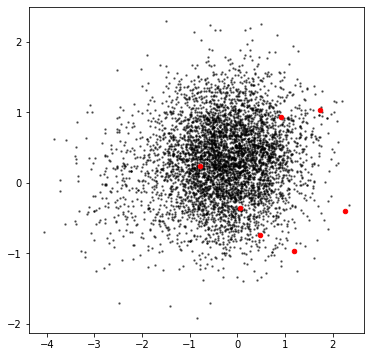

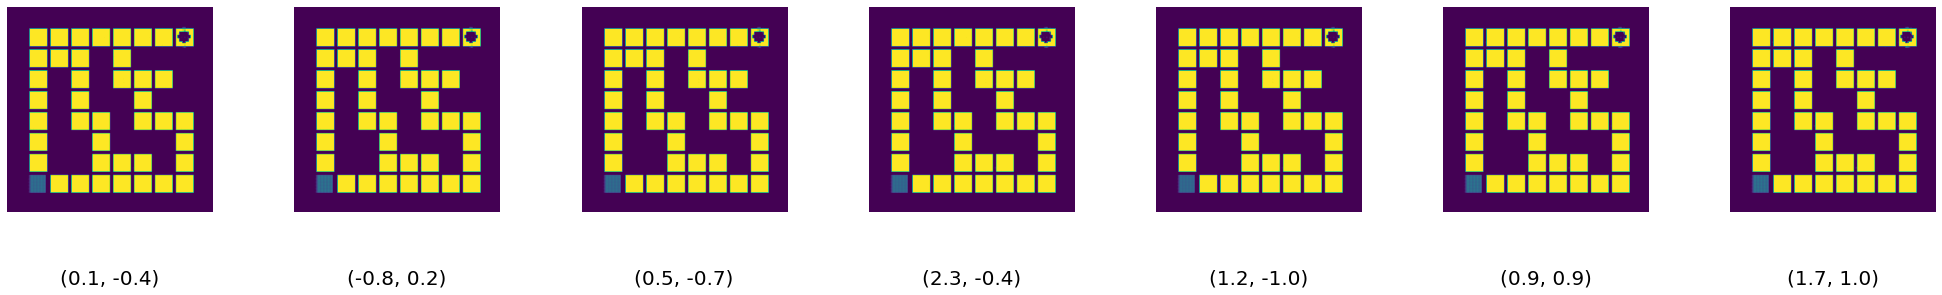

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[9] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[9] = ' + str(np.round(z[9],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

NameError: name 'obs_data1' is not defined

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [ ]:
a=vae1.encoder.predict(np.array([obs_data1[20]]))[0]
a.shape

(1, 16)

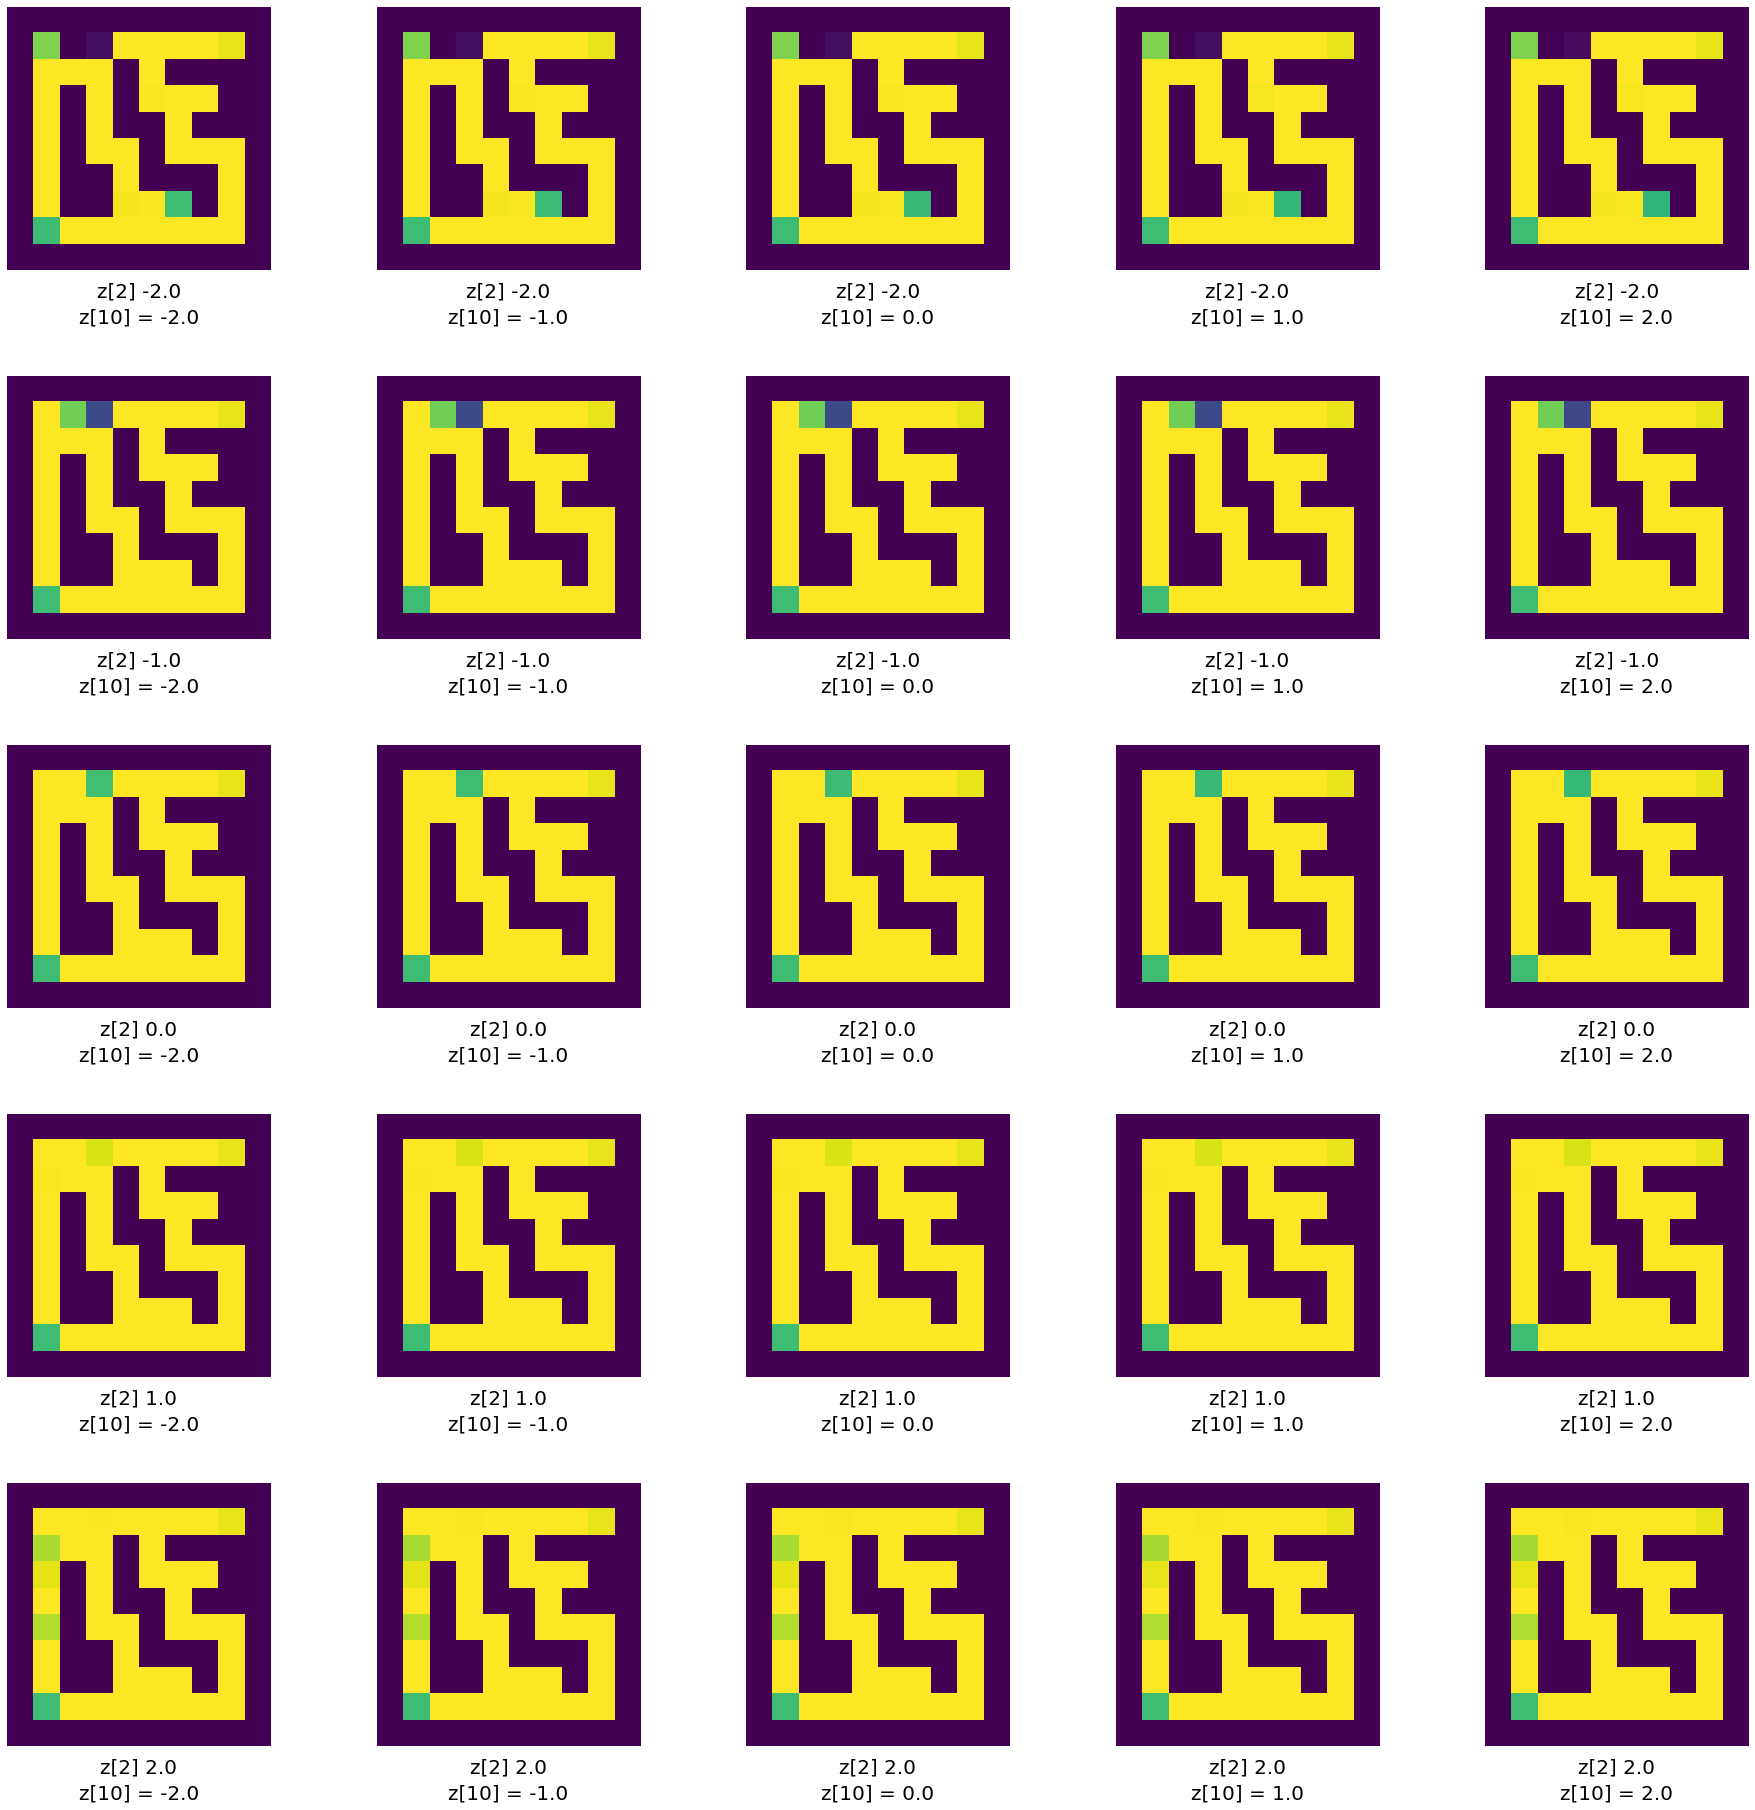

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [ ]:
decoded_obs

array([[[0.5002, 0.4998, 0.4999],
        [0.4998, 0.4996, 0.4999],
        [0.4997, 0.4998, 0.5004],
        ...,
        [0.5004, 0.5001, 0.5001],
        [0.5005, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.4998]],

       [[0.5003, 0.4999, 0.5002],
        [0.5001, 0.5002, 0.4997],
        [0.5   , 0.4998, 0.4998],
        ...,
        [0.5003, 0.5   , 0.4998],
        [0.5002, 0.5002, 0.5003],
        [0.4999, 0.5   , 0.4998]],

       [[0.5001, 0.4999, 0.5001],
        [0.4998, 0.4996, 0.5   ],
        [0.5002, 0.4996, 0.5   ],
        ...,
        [0.4998, 0.5005, 0.5   ],
        [0.5001, 0.5004, 0.4999],
        [0.4999, 0.4997, 0.5002]],

       ...,

       [[0.4996, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.499 ],
        [0.4998, 0.5003, 0.5006],
        ...,
        [0.5006, 0.4993, 0.4987],
        [0.5002, 0.5013, 0.5008],
        [0.5001, 0.5001, 0.4993]],

       [[0.5004, 0.4993, 0.4997],
        [0.4996, 0.5   , 0.4994],
        [0.5009, 0.4992, 0.5004],
        .

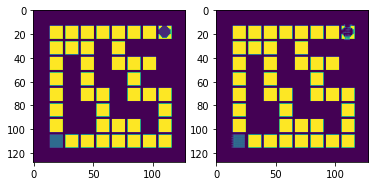

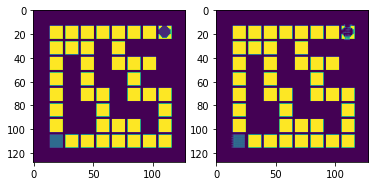

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


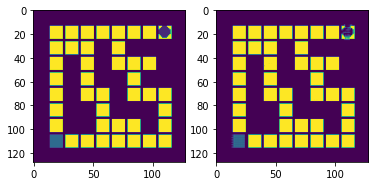

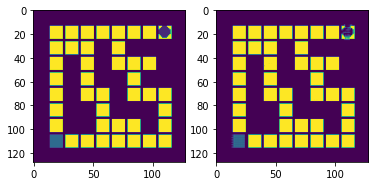

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


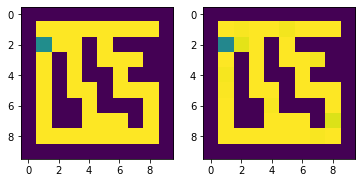

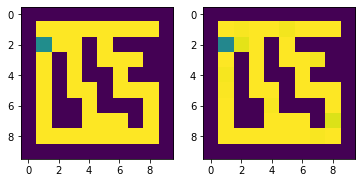

In [ ]:
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))


mu = [-0.3558 -0.0528 -0.3757  0.4181 -2.0788 -1.5809  0.0168  0.0351 -0.1338
 -0.2397  0.0067 -0.0117  0.3614 -0.1315 -0.114   0.1642]
log_var = [-1.0382 -0.068  -1.1881 -0.7305 -3.048  -3.149   0.0084 -0.2191 -0.5484
 -0.6238 -0.8556 -0.4464 -1.1159 -1.0433 -0.459  -0.175 ]


In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[ 0.1207 -0.2738  1.0664  0.7165 -1.9163 -1.4913 -0.3275 -0.2531  1.63
  -1.1101 -0.7689  0.0934  1.5053  0.4792  0.4035 -0.4164]]


informative dimensions:


array([ 0,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15])

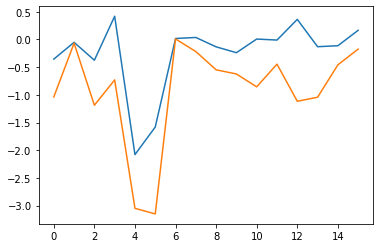

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

informative dimensions:


array([4, 5])

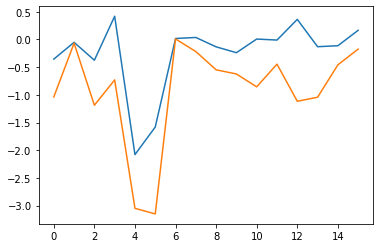

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 2)[0]
hot_zs1


In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

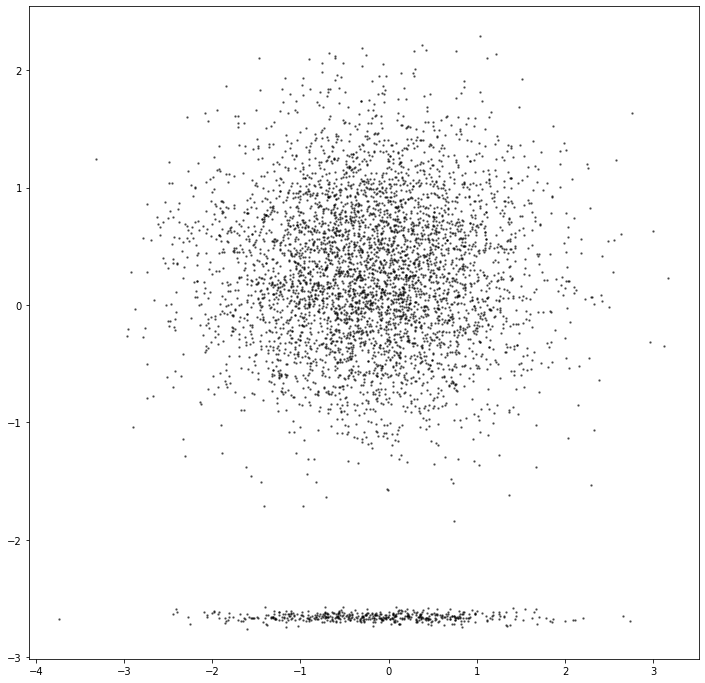

In [ ]:
n_to_show = 5000
figsize = 12
index1=4
index2=9

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data3[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[-0.7575 -0.2419  0.5177 -1.1676 -0.6038 -0.9336  0.1299 -0.4394 -1.7898
   0.0123 -0.0993  0.5096  0.4487  1.5971  0.4946 -0.8802  0.5962  0.6013
  -1.9244  0.0386 -0.3214  0.6642  0.3482  0.6916 -0.1901  0.1785  0.6175
   1.3837  2.3679 -0.9337  0.773  -0.6779]
 [-0.7575 -0.2419  0.5177 -1.1676 -0.6038 -0.9336  0.1299 -0.4394 -1.7898
   0.0123 -0.0993  0.5096  0.4487  1.5971  0.4946 -0.8802  0.5962  0.6013
  -1.9244  0.0386 -0.3214  0.6642  0.3482  0.6916 -0.1901  0.1785  0.6175
   1.3837  2.3679 -0.9337  0.773  -0.6779]
 [-0.7575 -0.2419  0.5177 -1.1676 -0.6038 -0.9336  0.1299 -0.4394 -1.7898
   0.0123 -0.0993  0.5096  0.4487  1.5971  0.4946 -0.8802  0.5962  0.6013
  -1.9244  0.0386 -0.3214  0.6642  0.3482  0.6916 -0.1901  0.1785  0.6175
   1.3837  2.3679 -0.9337  0.773  -0.6779]
 [-0.7575 -0.2419  0.5177 -1.1676 -0.6038 -0.9336  0.1299 -0.4394 -1.7898
   0.0123 -0.0993  0.5096  0.4487  1.5971  0.4946 -0.8802  0.5962  0.6013
  -1.9244  0.0386 -0.3214  0.6642  0.3482  0.6916 -0.

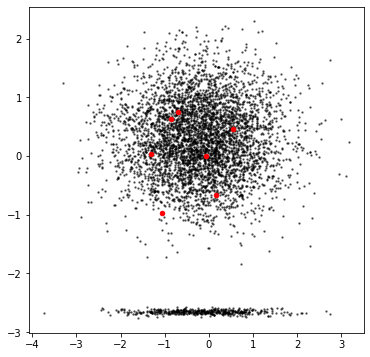

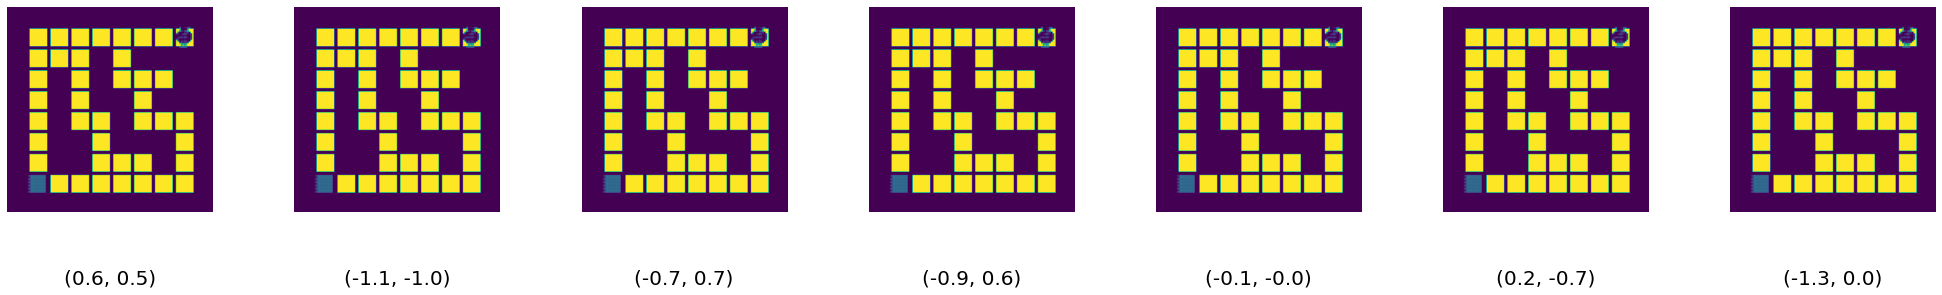

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 64, 64, 1)    10          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_56 (Flatten)            (None, 4096)         0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           131104      flatten_56[0][0]                 
____________________________________________________________________________________________

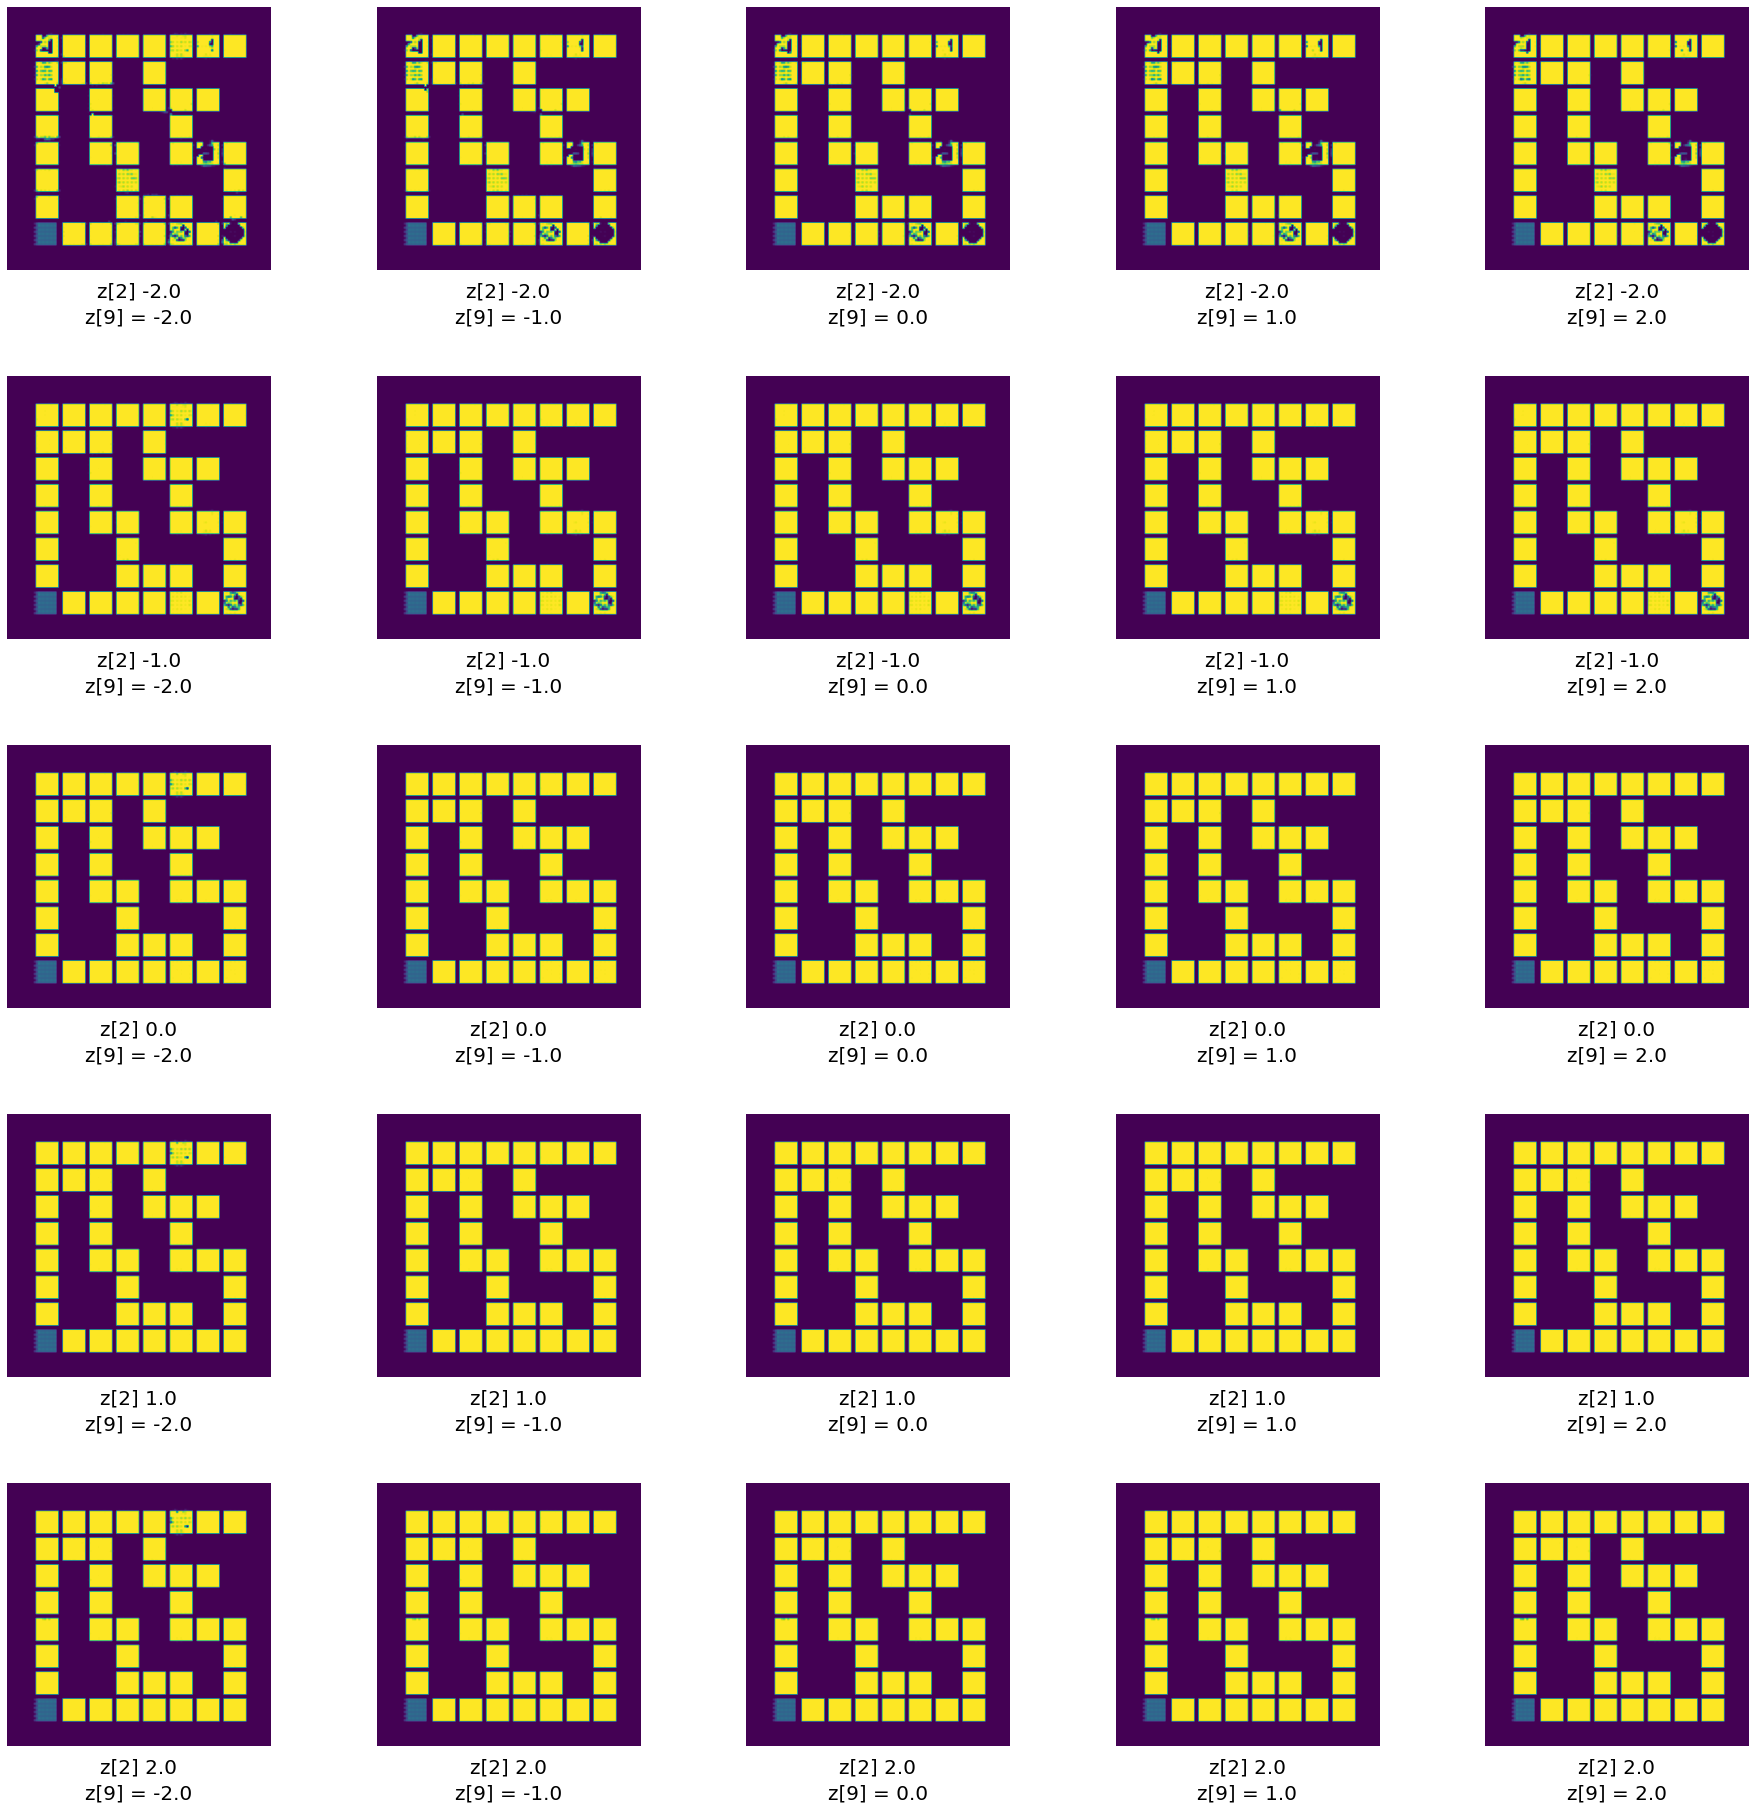

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[9] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[9] = ' + str(np.round(z[9],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

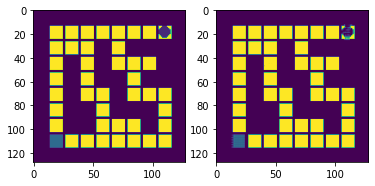

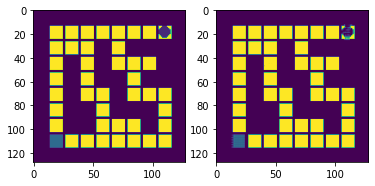

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

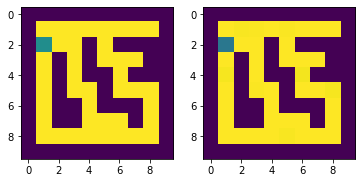

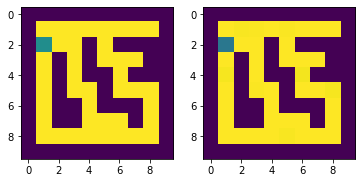

In [ ]:
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
DIR_NAME = './data/custom2dmaze_light2/'
file = os.listdir(DIR_NAME)[2]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

2026673840.npz
(1000, 10, 10, 1)


In [ ]:
obs = obs_data[0]

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

mu = [-0.0234  0.5437  0.6389  0.0062  0.0096 -0.0123 -0.0335 -0.0156  0.013
  0.0074  0.011   0.004  -0.006   0.0077  0.0021 -0.0075  0.02   -0.0068
 -0.006  -1.2412 -0.0067  1.1787  0.6365  0.0117 -0.0075 -0.0083  0.0026
 -0.351  -0.0015  0.0061 -0.0086 -0.0054]
log_var = [-0.0147 -0.7586 -4.0972 -0.0201 -0.0796 -0.0306 -0.0198 -0.0292 -0.0768
 -0.0262  0.0059  0.0054 -0.0025 -0.05   -0.0193  0.0042 -0.035  -0.0146
 -0.0399 -6.8083 -0.0359 -6.9107 -4.4676 -0.0175 -0.0073 -0.0183 -0.0074
 -3.2339 -0.0001  0.0065 -0.0238 -0.0458]


z = [[ 2.8182 -0.6718  0.7497 -0.5334  0.5615  1.4379  0.2992 -0.379   0.1891
  -0.2905  0.8553 -0.2143 -1.1071 -1.1198 -0.8264  0.5326  0.7779  0.8145
  -0.4495 -1.2028 -0.5812  1.1724  0.7357 -0.3899 -0.4228  0.05    0.0813
  -0.2697  0.2009  0.5995  0.8116 -3.4047]]
informative dimensions:


array([ 1,  2, 19, 21, 22, 27])

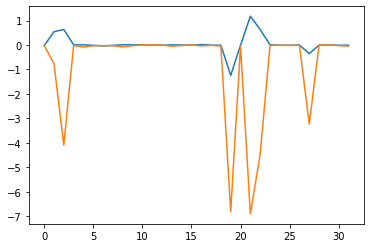

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data2 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data = np.load(DIR_NAME + file)['obs']

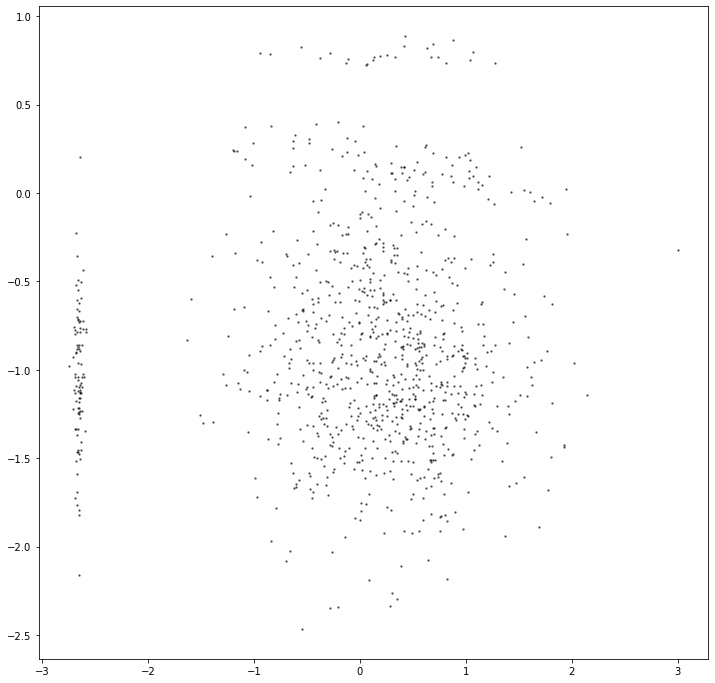

In [ ]:
n_to_show = 1000
figsize = 12
index1=9
index2=15

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 0.7299 -0.0113  0.5658 -0.9249 -0.98    0.6047 -1.3653  0.6468 -2.273
   1.2242  0.4034  1.1891 -0.6874  0.9648 -0.7341 -1.1468 -0.1049  0.5231
  -1.9234 -0.8821  0.859  -0.4805 -0.8079  0.979  -0.9885  0.791  -0.452
   0.5418  0.372  -0.4506 -0.6465 -0.6789]
 [ 0.7299 -0.0113  0.5658 -0.9249 -0.98    0.6047 -1.3653  0.6468 -2.273
   1.2242  0.4034  1.1891 -0.6874  0.9648 -0.7341 -1.1468 -0.1049  0.5231
  -1.9234 -0.8821  0.859  -0.4805 -0.8079  0.979  -0.9885  0.791  -0.452
   0.5418  0.372  -0.4506 -0.6465 -0.6789]
 [ 0.7299 -0.0113  0.5658 -0.9249 -0.98    0.6047 -1.3653  0.6468 -2.273
   1.2242  0.4034  1.1891 -0.6874  0.9648 -0.7341 -1.1468 -0.1049  0.5231
  -1.9234 -0.8821  0.859  -0.4805 -0.8079  0.979  -0.9885  0.791  -0.452
   0.5418  0.372  -0.4506 -0.6465 -0.6789]
 [ 0.7299 -0.0113  0.5658 -0.9249 -0.98    0.6047 -1.3653  0.6468 -2.273
   1.2242  0.4034  1.1891 -0.6874  0.9648 -0.7341 -1.1468 -0.1049  0.5231
  -1.9234 -0.8821  0.859  -0.4805 -0.8079  0.979  -0.9885  0

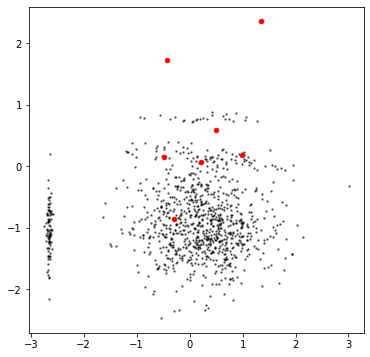

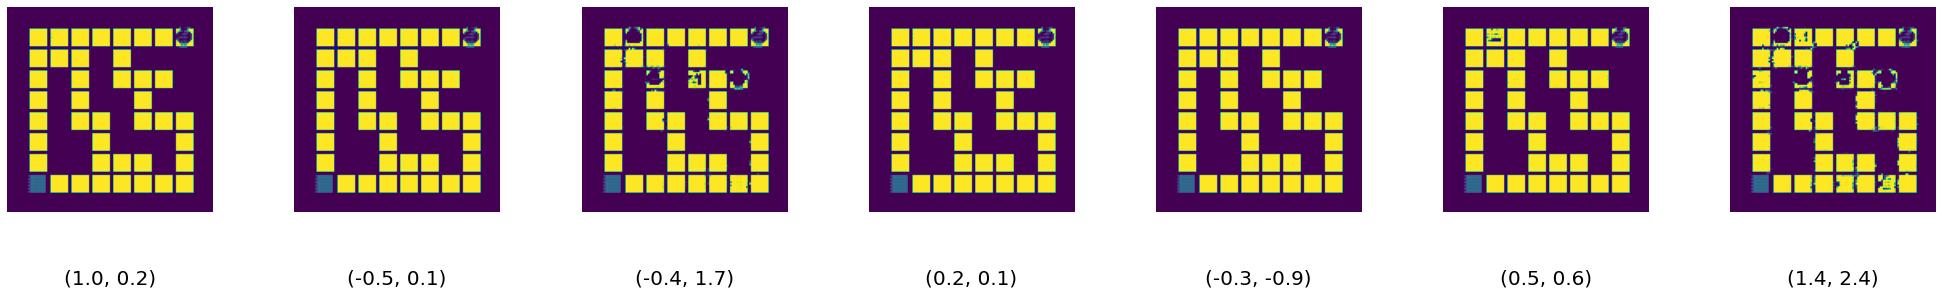

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

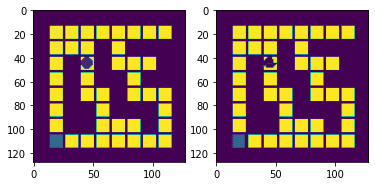

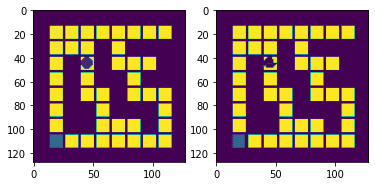

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[989]

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data3[990]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[9] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[9] = ' + str(np.round(z[9],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 64, 64, 1)    10          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_37 (Flatten)            (None, 4096)         0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 32)           131104      flatten_37[0][0]                 
____________________________________________________________________________________________

NameError: name 'obs_data1' is not defined

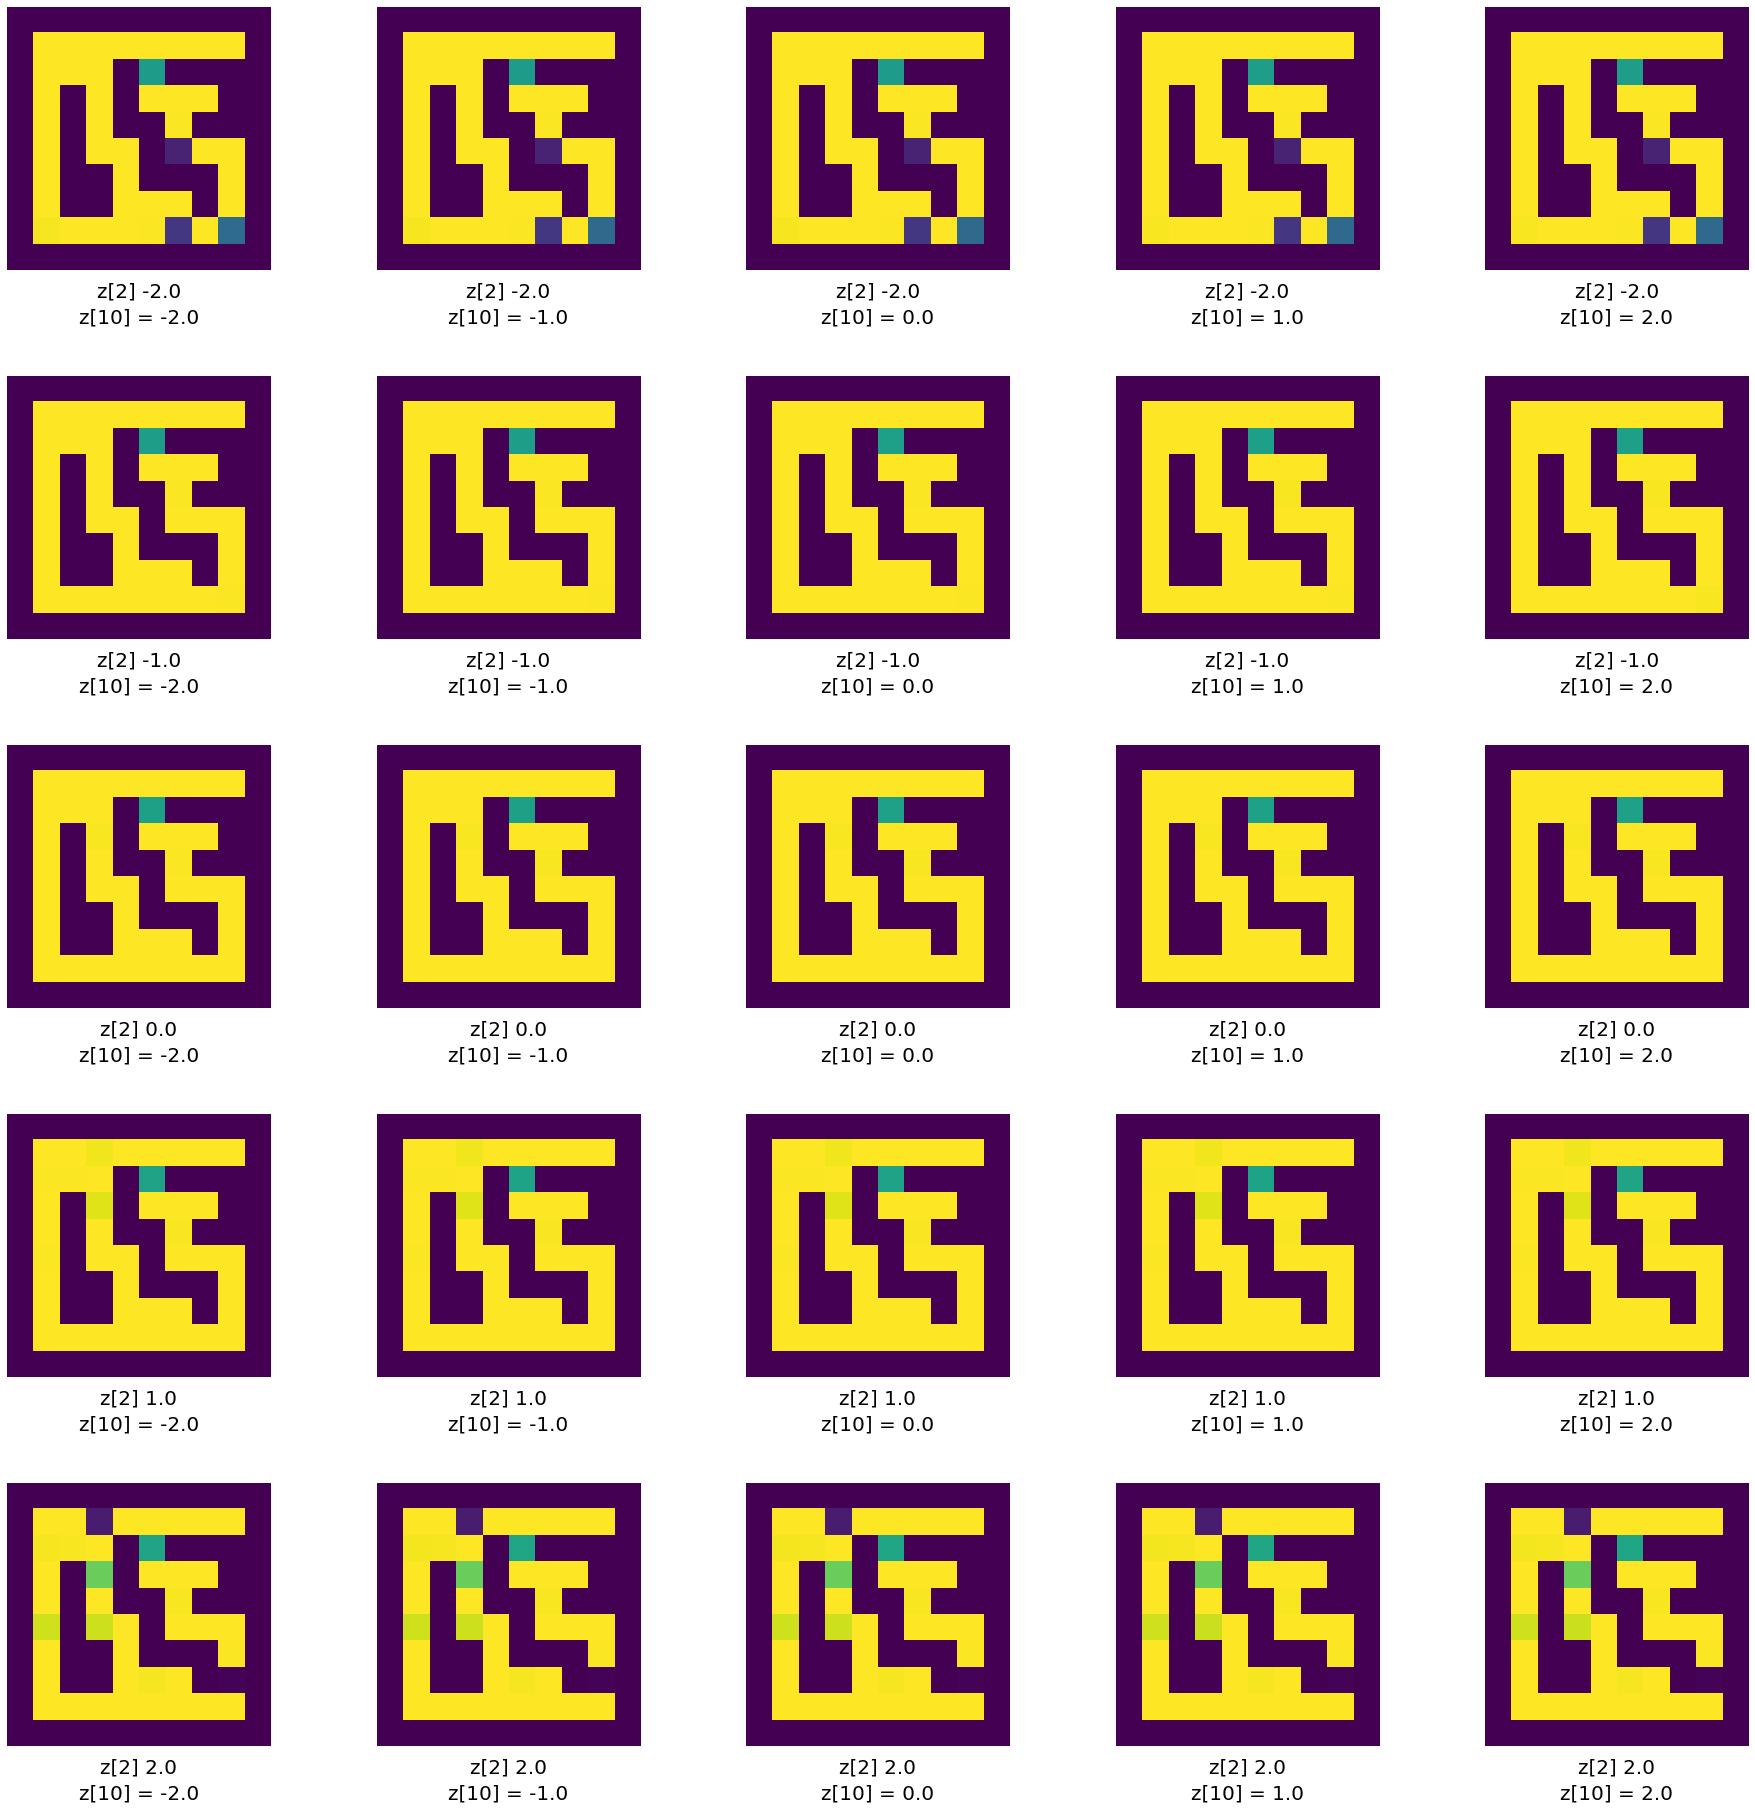

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[260]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [ ]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z8 = sample_z[8]
                ,z10 = sample_z[10]
                ,z13 = sample_z[13]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z26= sample_z[26]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[8] = z8
    z[10] = z10
    z[13] = z13
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[26] = z26
    z[27] = z27
    
    decoded_obs = vae1.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

KeyboardInterrupt: 

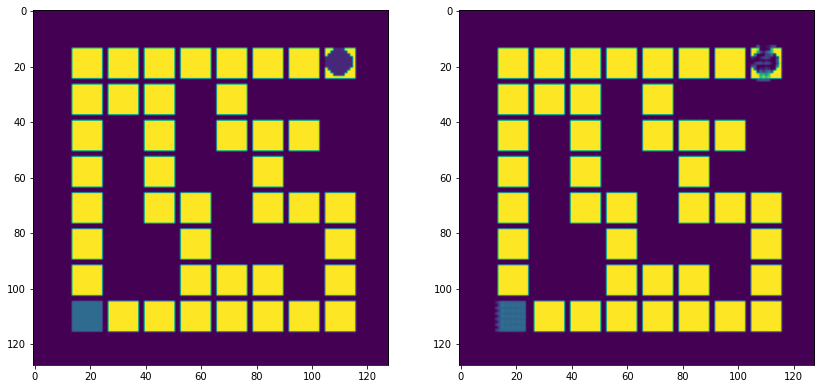

In [ ]:
from vae.arch_custommazegrayz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray5000.10z32k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す
obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)

fig_width = 14  # Adjust this value as needed
fig_height = 7  # Adjust this value as needed

# Initialize the figure with the desired size
plt.figure(figsize=(fig_width, fig_height))
for idx in range(400,900,4):
    plt.gca().cla() 
    
    obs = obs_data3[idx]
    z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
    # z_decoded1を保存するファイル名
    # save_file = f'./vae/decoded1/z_decoded1_data{idx}.npz'
    # z_decoded1をNumPyの配列に変換
    # z_decoded1_array = np.array(z_decoded1)
    # # z_decoded1をnpz形式で保存
    # np.savez(save_file, z_decoded1_array=z_decoded1_array)
    plt.subplot(121)
    plt.imshow( obs[:,:,0])
    plt.subplot(122)
    plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    print(idx)
    
   


In [ ]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z8=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z13=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z26=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.7293716073036194, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=-0.7293716, z2=-1.5487323, z4=0.03945683, z5=-0.81787795, z6=0.71974146, z7=0.9768293, z8=0.714299, z10=-0.65156126, z13=-1.3383039, z15=0.9658649, z24=0.70276463, z25=-0.46953642, z26=0.21323122, z27=-0.19417028)>

In [ ]:
vae.full_model.summary()

Model: "vae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              [(None, 32), (None, 32),  264032    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         1851939   
Total params: 2,115,971
Trainable params: 2,115,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mus, log_vars, _  = vae2.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae2.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.017   1.0687  0.0068 -0.0073 -0.0004 -0.0213  0.0033  0.024   0.0079
  0.0035 -0.0131  0.0011 -0.015  -0.0092  0.0047  0.0038 -0.0126 -0.0023
  0.0115 -0.0105  0.0001 -0.8742 -0.0073 -0.0113 -0.0019 -0.009   0.0036
 -0.0084 -0.0062 -0.0101  0.0079 -0.0058]
log_var = [-0.005  -3.2656  0.0012 -0.0064 -0.0832 -0.0067  0.0038  0.0007 -0.0115
  0.0037  0.0165 -0.0034 -0.004  -0.0111 -0.0069 -0.0027 -0.0044  0.0076
 -0.0005 -0.1436  0.0058 -0.9116  0.0098 -0.0025  0.0009  0.006  -0.0126
 -0.0026 -0.0077 -0.0043 -0.0074  0.0064]
z = [[ 0.7776  1.1109 -0.3628 -0.4584  1.5002  1.0793 -1.1028  0.5392 -0.3817
  -0.1768 -0.961  -1.1162 -1.0017  0.8331  0.1124 -0.7831  0.4714 -1.2231
   1.0771  0.4763  1.2822 -1.8684  0.513  -2.0841  0.3737 -0.3046  0.1204
   0.726   1.7934  0.2073  0.259  -0.0664]]


informative dimensions:


array([ 1, 19, 21])

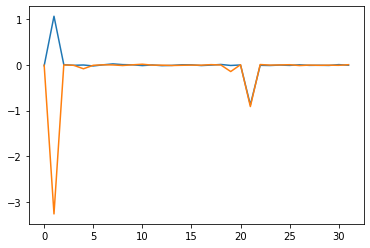

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1